In [1]:
#test avec prophet

In [22]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [23]:
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option("plotting.backend", "pandas_bokeh")

Loading BokehJS ...

In [58]:
uber = pd.read_csv('../uber_data.csv', parse_dates = ['pickup_dt'])

In [59]:
man = uber[uber['borough'] == 'Queens']

In [60]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting.forecasting import plot_ys

man = man.reset_index(drop = True)

train, test = temporal_train_test_split(man, test_size=720)


In [61]:
train = train[['pickup_dt', 'pickups']]
train

,pickup_dt,pickups
0,2015-01-01 01:00:00,405
1,2015-01-01 02:00:00,331
2,2015-01-01 03:00:00,440
3,2015-01-01 04:00:00,344
4,2015-01-01 05:00:00,241
...,...,...
3618,2015-05-31 19:00:00,615
3619,2015-05-31 20:00:00,610
3620,2015-05-31 21:00:00,726
3621,2015-05-31 22:00:00,677


In [62]:
test = test[['pickup_dt', 'pickups']]
test

,pickup_dt,pickups
3623,2015-06-01 00:00:00,552
3624,2015-06-01 01:00:00,677
3625,2015-06-01 02:00:00,599
3626,2015-06-01 03:00:00,222
3627,2015-06-01 04:00:00,121
...,...,...
4338,2015-06-30 19:00:00,417
4339,2015-06-30 20:00:00,438
4340,2015-06-30 21:00:00,483
4341,2015-06-30 22:00:00,556


In [63]:
train.columns = ['ds', 'y']

In [64]:
train

,ds,y
0,2015-01-01 01:00:00,405
1,2015-01-01 02:00:00,331
2,2015-01-01 03:00:00,440
3,2015-01-01 04:00:00,344
4,2015-01-01 05:00:00,241
...,...,...
3618,2015-05-31 19:00:00,615
3619,2015-05-31 20:00:00,610
3620,2015-05-31 21:00:00,726
3621,2015-05-31 22:00:00,677


In [65]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [66]:
future = model.make_future_dataframe(periods = len(test), freq='H')
len(future)

4343

In [67]:
future

,ds
0,2015-01-01 01:00:00
1,2015-01-01 02:00:00
2,2015-01-01 03:00:00
3,2015-01-01 04:00:00
4,2015-01-01 05:00:00
...,...
4338,2015-06-30 19:00:00
4339,2015-06-30 20:00:00
4340,2015-06-30 21:00:00
4341,2015-06-30 22:00:00


In [68]:
#future.to_csv('../X_test_prophet.csv')

In [69]:
forecast = model.predict(future)


In [70]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[3623:3627]

,ds,yhat,yhat_lower,yhat_upper
3623,2015-06-01 00:00:00,506.724116,413.785420,596.071676
3624,2015-06-01 01:00:00,398.984093,306.469449,482.882058
3625,2015-06-01 02:00:00,295.580558,210.948218,379.036141
3626,2015-06-01 03:00:00,231.339570,148.423437,322.200189


In [71]:
test

,pickup_dt,pickups
3623,2015-06-01 00:00:00,552
3624,2015-06-01 01:00:00,677
3625,2015-06-01 02:00:00,599
3626,2015-06-01 03:00:00,222
3627,2015-06-01 04:00:00,121
...,...,...
4338,2015-06-30 19:00:00,417
4339,2015-06-30 20:00:00,438
4340,2015-06-30 21:00:00,483
4341,2015-06-30 22:00:00,556


In [40]:
#test.to_csv('../y_test_prophet.csv', index=False)

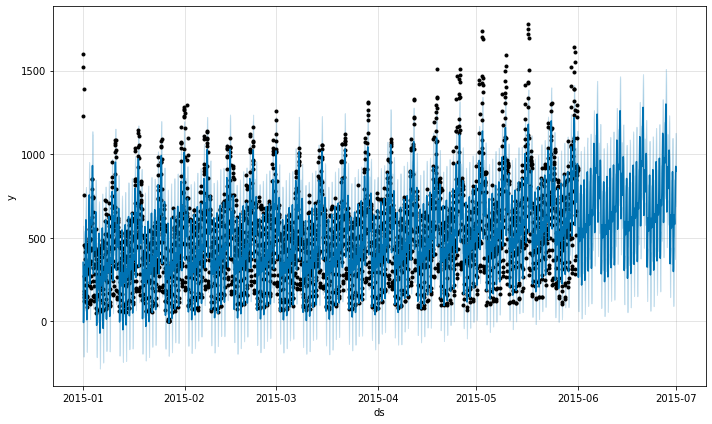

In [41]:
fig = model.plot(forecast)

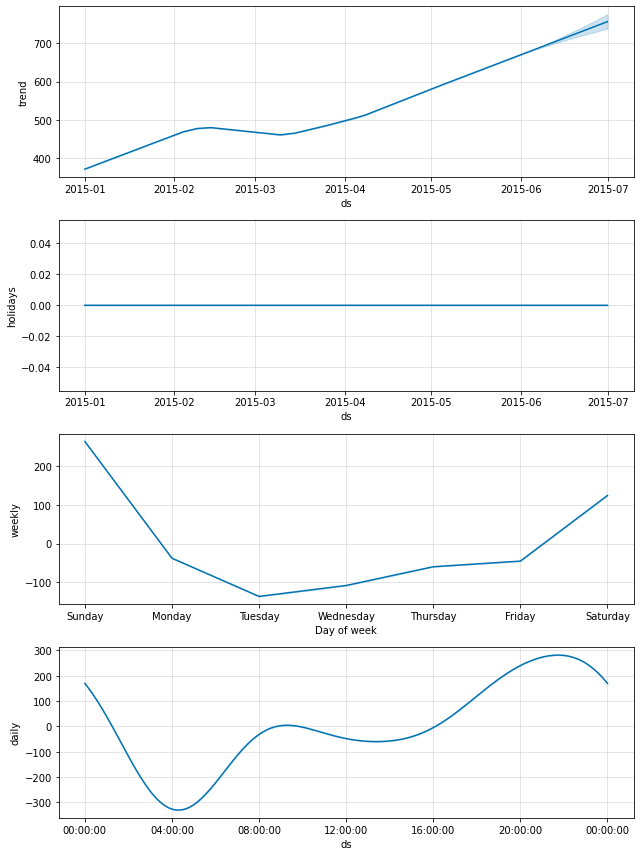

In [42]:
fig = model.plot_components(forecast)

In [72]:
def smape_perso(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [73]:
smape_perso(test['pickups'],forecast['yhat'])

22.84537213610392

In [57]:
forecast['yhat'].to_csv('pred_prophet_bronx.csv')

In [45]:
forecast['yhat'][-720:]

3623    802.393877
3624    660.449072
3625    492.399853
3626    344.434137
3627    264.111317
           ...    
4338    831.501481
4339    885.934044
4340    919.990297
4341    927.535591
4342    897.894439
Name: yhat, Length: 720, dtype: float64

In [46]:
tp = np.array(test['pickups'])
test_df = pd.Series(tp, index = test['pickup_dt'])
test_df.index = pd.to_datetime(test_df.index)
test_df

pickup_dt
2015-06-01 00:00:00    528
2015-06-01 01:00:00    337
2015-06-01 02:00:00    194
2015-06-01 03:00:00    128
2015-06-01 04:00:00    170
                      ... 
2015-06-30 19:00:00    777
2015-06-30 20:00:00    817
2015-06-30 21:00:00    829
2015-06-30 22:00:00    860
2015-06-30 23:00:00    990
Length: 720, dtype: int64

In [47]:
f = forecast[-720:]
fp = np.array(f['yhat'])

forecast_df = pd.Series(fp, index = f['ds'])
forecast_df.index = pd.to_datetime(forecast_df.index)
forecast_df

ds
2015-06-01 00:00:00    802.393877
2015-06-01 01:00:00    660.449072
2015-06-01 02:00:00    492.399853
2015-06-01 03:00:00    344.434137
2015-06-01 04:00:00    264.111317
                          ...    
2015-06-30 19:00:00    831.501481
2015-06-30 20:00:00    885.934044
2015-06-30 21:00:00    919.990297
2015-06-30 22:00:00    927.535591
2015-06-30 23:00:00    897.894439
Length: 720, dtype: float64

In [48]:
pd.concat([test_df,forecast_df], axis=1).plot()

Figure(id='1002', ...)

In [49]:
import pickle

pickle.dump(model, open('model_prophet_brooklyn.pkl','wb'))